# NLTK with Lewis Grassic Gibbon First Editions

**Data Source:** [National Library of Scotland Data Foundry](https://data.nls.uk/data/digitised-collections/lewis-grassic-gibbon-first-editions/)

**Code Reference:** 
National Library of Scotland. Exploring Lewis Grassic Gibbon First Editions. National Library of Scotland, 2020. https://doi.org/10.34812/gq6w-6e91

**Date:** April 6, 2022

**Course:** Text Analysis with NLTK (Week 2, Class 3); Centre for Data, Culture & Society

***

**Corpus Name:** Lewis Grassic Gibbon First Editions

**Questions:**
1. What are the most common words in the corpus?
    * How many words are in the entire corpus?
        * Create a list of all the alphabetic tokens (words)
    * Calculate the frequency distribution (`FreqDist()`)
    

2. What are the most common words in one book from the corpus?
    * Identify which files in the corpus are for which book
        * Create a list of all the alphabetic tokens (words)
    * Calculate the frequency distribution for individual files
    

3. How does the word choice of the author change from one book to another?
    * How many words are in each book (each file in the corpus)?
    * How many *unique* words are in each book?
        * Normalize (standardize) the words by casefolding
    * Lexical diversity = count of unique words / count of all words

***

## Table of Contents

I. [Preparation](#preparation)

II. [Normalization](#normalization)

III. [Data Cleaning](#data_cleaning)

IV. [Analysis](#analysis)

***

<a id="preparation"></a>
## I. Preparation

In [1]:
# To load a CSV file with an inventory of the documents in the corpus
import pandas as pd

# To create data visualizations
import altair as alt
import matplotlib.pyplot as plt

# To perform text analysis
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
from nltk.corpus import PlaintextCorpusReader
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.draw.dispersion import dispersion_plot as displt

import re # Regular Expressions (RegEx)

/tmp/ipykernel_187788/1176932476.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package punkt to /home/dave/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dave/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dave/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data_directory = "nls-text-gibbon"
wordlists = PlaintextCorpusReader(data_directory, "\d.*", encoding="latin1")
corpus_tokens = wordlists.words()  # method for tokenization
print(corpus_tokens[:20])

['R', ',', '17U', '\\(', 'o', 'First', 'journey', 'National', 'Library', 'of', 'Scotland', 'â', '\x80\x98', 'B000054136', '*', 'TIMBUCTOO', 'NIGER', 'BY', 'THE', 'SAME']


To get a sense of the data we're working with, let's create a functions that tell us how many tokens, sentences, and files are in our corpus!

In [3]:
def calculate_total_tokens(plaintext_corpus_read_lists):
    """A simpler approach would have been:

    def calculate_total_tokens(plaintext_corpus_read_lists):
        return len(wordlists.tokens())

    ... however, I wanted to show how you can perform operations on 
    individual texts in the corpus
    """
    total_tokens = 0
    for fileid in plaintext_corpus_read_lists.fileids():
        total_tokens += len(plaintext_corpus_read_lists.words(fileid))
    return total_tokens

def calculate_total_sents(plaintext_corpus_read_lists):
    total_sents = 0
    for fileid in plaintext_corpus_read_lists.fileids():
        total_sents += len(plaintext_corpus_read_lists.sents(fileid))
    return total_sents

def calculate_total_files(plaintext_corpus_read_lists):
    return len(plaintext_corpus_read_lists.fileids())

def display_corpus_statistics(name, total_tokens, total_sents, total_files):
    print(f"Total tokens in {name}: {total_tokens}")
    print(f"Total tokens in {name}: {total_sents}")
    print(f"Total tokens in {name}: {total_files}")

display_corpus_statistics(
    "Lewis Grassic Gibbon Corpus",
    calculate_total_tokens(wordlists),
    calculate_total_sents(wordlists),
    calculate_total_files(wordlists)
)


Total tokens in Lewis Grassic Gibbon Corpus: 1506095
Total tokens in Lewis Grassic Gibbon Corpus: 70826
Total tokens in Lewis Grassic Gibbon Corpus: 16


In [4]:
print(type(wordlists))

<class 'nltk.corpus.reader.plaintext.PlaintextCorpusReader'>


In [5]:
print(wordlists.fileids())

['205174241.txt', '205174242.txt', '205174243.txt', '205174244.txt', '205174245.txt', '205174246.txt', '205174247.txt', '205174248.txt', '205174249.txt', '205174250.txt', '205174251.txt', '205174252.txt', '205174253.txt', '205174254.txt', '205174255.txt', '205202834.txt']


There is also a csv file which gives some metadata. Let's load this into a pandas DataFrame with `pd.read_csv`. It has no header row, so set the `header` parameter to `None` and use the `names` parameter to give it the column names `'fileid'` and `'title'`

In [6]:
# Your code here
df = pd.read_csv('nls-text-gibbon/gibbon-inventory.csv', header=None, names=['fileid', 'title'])
df

,fileid,title
0,205174241.txt,Niger - R.176.i
1,205174242.txt,Thirteenth disciple - Vts.137.d
2,205174243.txt,Three go back - Vts.152.f.22
3,205174244.txt,Calends of Cairo - Vts.153.c.16
4,205174245.txt,Lost trumpet - Vts.143.j.8
5,205174246.txt,Image and superscription - Vts.118.l.16
6,205174247.txt,Spartacus - Vts.6.k.19
7,205174248.txt,"Persian dawns, Egyptian nights - Vts.148.d.8"
8,205174249.txt,Scots quair - Cloud howe - NF.523.b.30
9,205174250.txt,Scots quair - Grey granite - NF.523.b.31


Let's create a **dictionary**, one of the Python data types, that associates each `fileid` with each `title`.  That way we can quickly determine from our text analysis with NLTK what book we are looking at, since NLTK uses the fileids (the names of the files in our data directory, a.k.a. folder).

In [7]:
# obtain a list of all file IDs
# your code here
fileids = list(df["fileid"])
print(f"List of file IDs:\n{fileids}\n")

# obtain a list of all titles
# your code here
titles = list(df["title"])
print(f"List of titles:\n{titles}\n")

# create a dictionary where the keys are file IDs and the values are titles
# your code here
lgg_dict = dict(zip(fileids, titles))
print(f"Dictionary of file IDs and titles:\n{lgg_dict}\n")

List of file IDs:
['205174241.txt', '205174242.txt', '205174243.txt', '205174244.txt', '205174245.txt', '205174246.txt', '205174247.txt', '205174248.txt', '205174249.txt', '205174250.txt', '205174251.txt', '205174252.txt', '205174253.txt', '205174254.txt', '205174255.txt', '205202834.txt']

List of titles:
['Niger - R.176.i', 'Thirteenth disciple - Vts.137.d', 'Three go back - Vts.152.f.22', 'Calends of Cairo - Vts.153.c.16', 'Lost trumpet - Vts.143.j.8', 'Image and superscription - Vts.118.l.16', 'Spartacus - Vts.6.k.19 ', 'Persian dawns, Egyptian nights - Vts.148.d.8', 'Scots quair - Cloud howe - NF.523.b.30', 'Scots quair - Grey granite - NF.523.b.31', 'Scots quair - Sunset song - NF.523.b.29', 'Hanno, or, The future of exploration - S.114.j.21', 'Nine against the unknown - S.72.d.10', 'Conquest of the Maya - S.60.c', 'Gay hunter - Vts.215.j.26', 'Stained radiance - T.204.f']

Dictionary of file IDs and titles:
{'205174241.txt': 'Niger - R.176.i', '205174242.txt': 'Thirteenth discip

In [8]:
# Now we can say...
a_file_id = fileids[10]
lgg_dict[a_file_id]

'Scots quair - Sunset song - NF.523.b.29'

In [9]:
# ...or simply...
lgg_dict['205174251.txt']

'Scots quair - Sunset song - NF.523.b.29'

Let's create lists of all the words (alphabetic tokens) and sentences in the LGG corpus.

In [10]:
# your code here
def get_words_sents (plaintext_corpus_read_lists):
    """Creates lists of all words and all tokens in a given corpus.
    I've added this docstring because docstrings are good practice,
    and I can show you one of the standard formats for Python 
    docstrings
    
    Parameters
    ----------
        plaintext_corpus_read_lists (PlaintextCorpusReader):
            corpus generated from a collection of plantext files

    Returns
    -------
        all_words (list):
            list of all words: that is, all tokens consisting of alphabetical
            characters only
        all_sents (list)
            list of all sentences
    """
    # your code here
    all_words = []
    all_sents = []
    for fileid in plaintext_corpus_read_lists.fileids():
        
        file_words = plaintext_corpus_read_lists.words(fileid)
        all_words += [str(word) for word in file_words]
        
        file_sents = sent_tokenize(plaintext_corpus_read_lists.raw(fileid))
        all_sents += [str(sent) for sent in file_sents]
        
    return all_words, all_sents

In [11]:
lgg_words, lgg_sents = get_words_sents(wordlists)
print(lgg_words[:20])
print(lgg_sents[:3])

['R', ',', '17U', '\\(', 'o', 'First', 'journey', 'National', 'Library', 'of', 'Scotland', 'â', '\x80\x98', 'B000054136', '*', 'TIMBUCTOO', 'NIGER', 'BY', 'THE', 'SAME']
['R, 17U \\(o\r\nFirst journey\r\nNational Library of Scotland\r\nâ\x80\x98B000054136*\r\nTIMBUCTOO\r\nNIGER\r\nBY THE SAME AUTHOR\r\nNovels forming the trilogy, A Scots Quair\r\nPart I. Sunset Song (1932)\r\nPart II.', 'Cloud Howe (1933)\r\nPart III.', 'Grey Granite (1934)\r\nMUNCiO PARK\r\nNIGER\r\nTHE LIFE OF MUNGO PARK\r\nBY\r\nLEWIS GRASSIC GIBBON\r\nEDINBURGH\r\nTHE PORPOISE PRESS\r\nFIRST PUBLISHED IN 1034\r\nBY THE PORPOISE PRESS\r\nI33A GEORGE STREET, EDINBURGH\r\nLONDON *.']


<a id="data_cleaning"></a>
## II. Data Cleaning with RegEx and NLTK

Let's calculate the frequency distribution, or the count of occurrences of each word across the entire corpus:

In [12]:
fdist_lgg = FreqDist(lgg_words)
print("Total words after filtering:", fdist_lgg.N())
print("50 most common words after filtering:", fdist_lgg.most_common(50))

Total words after filtering: 1506095
50 most common words after filtering: [(',', 86225), ('the', 82215), ('.', 69949), ('and', 49686), ('of', 40160), ('a', 27930), ('to', 24359), ('in', 22692), ('\x80\x99', 21483), ('â', 19943), ('that', 15065), ('was', 14704), ('-', 13435), ('his', 11708), ('he', 11433), ('had', 11078), ('with', 10261), ('it', 9070), ('at', 8320), ('her', 8319), ('on', 7965), ('as', 7831), ('\x80\x94', 6779), ('for', 6755), ('s', 6752), ('I', 6569), ('from', 6293), ('she', 6062), ('?', 6033), ('they', 5610), ('The', 5354), ('him', 5346), ('you', 5264), ('\x80\x98', 4920), ('¬', 4700), ('\x80\x9c', 4619), ('were', 4596), ('And', 4470), ('He', 4444), ('\x80\x9d', 4229), ('by', 4086), ('up', 4066), ('out', 3758), ('their', 3710), ('but', 3535), ('them', 3503), ('t', 3421), ('not', 3402), ('all', 3381), ('But', 3356)]


Uh-oh! Note the 'â' and the '\x80\x99' - those don't look like they're meant to be there! The NLS Gibbon corpus is, after all, the result of scanning and running OCR (Optical Character Recognition), which is not totally reliable. Before doing our analysis, let's do some data cleaning, with ...

### Regular Expresssions (RegEx)

* **WHAT? Pattern matching strings in Python**
* **WHY? To find specific words or phrases, or variations of a particular word or phrase**
    * Once found, they can be replaced, so this is useful for cleaning text with digitization errors.  Optical Character Recognition (OCR) and Handwriting Recognition (HWT or HRT) technologies are imperfect, so you will find errors in digitized text corpora (unless of course they've been manually reviewed and corrected).
* **HOW? Combinations of special characters with a RegEx compiler**
    * In programming, a *compiler* translates code from one programming language to another.  In a sense, RegEx is a language that can sit on top of Python.  RegEx works with Python data types and syntax but it also has its own special characters and methods that plain Python doesn't use.
    
My favorite resource for practice with and testing Regular Expressions is  is [Regex101.com](https://regex101.com): also check out [Pythex.org](https://pythex.org) for the cheat sheet it provides!

In [13]:
# # To use Regular Expressions (RegEx)
# import re

# # To perform text analysis
# import nltk
# from nltk.tokenize import word_tokenize, sent_tokenize
# nltk.download('punkt')
# from nltk.corpus import PlaintextCorpusReader
# nltk.download('wordnet')
# from nltk.corpus import wordnet
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.text import Text

In [14]:
lgg = nltk.Text(lgg_words)
print(lgg[:100])

['R', ',', '17U', '\\(', 'o', 'First', 'journey', 'National', 'Library', 'of', 'Scotland', 'â', '\x80\x98', 'B000054136', '*', 'TIMBUCTOO', 'NIGER', 'BY', 'THE', 'SAME', 'AUTHOR', 'Novels', 'forming', 'the', 'trilogy', ',', 'A', 'Scots', 'Quair', 'Part', 'I', '.', 'Sunset', 'Song', '(', '1932', ')', 'Part', 'II', '.', 'Cloud', 'Howe', '(', '1933', ')', 'Part', 'III', '.', 'Grey', 'Granite', '(', '1934', ')', 'MUNCiO', 'PARK', 'NIGER', 'THE', 'LIFE', 'OF', 'MUNGO', 'PARK', 'BY', 'LEWIS', 'GRASSIC', 'GIBBON', 'EDINBURGH', 'THE', 'PORPOISE', 'PRESS', 'FIRST', 'PUBLISHED', 'IN', '1034', 'BY', 'THE', 'PORPOISE', 'PRESS', 'I33A', 'GEORGE', 'STREET', ',', 'EDINBURGH', 'LONDON', '*.', 'FABER', 'AND', 'FABER', 'LIMITED', '24', 'RUSSELL', 'SQUARE', ',', 'W', '.', 'G', '.', 'I', 'PRINTED', 'IN', 'SCOTLAND']


In [15]:
lgg.concordance("\x80\x98")

Displaying 25 of 4920 matches:
ourney National Library of Scotland â  B000054136 * TIMBUCTOO NIGER BY THE S
h biography . A much better book is â  H . B . â  s â  Life of Mungo Par
 the room , and Mungo himÂ ¬ self . â  Youâ  re destroying the book , â 
ight of all his bio - 14 graphers , â  Ay , you , or somebody else , will on
racÂ ¬ teristic , it was national : â  You poor useless thing , do you think
surrounding hills , he went often , â  to read poetry â . This was mostly 
upon the record the affirÂ ¬ mation â  Some sparks of latent spirit which oc
 ¬ ously qualified by ( yet again ) â  the gravity and steady decorum of his
o study medicine . ! 9 3His gravity â  not altogether thrown awayâ , he wa
thematics , in both of which he was â  very apt . For the rest he no doubt p
e a letter to Anderson in Selkirk : â  I have now got upon the first step of
 just before the Worcester sailed : â  I wish you may be able to look upon t
e Great River , croco

Looks like "\x80\x98" is the [UTF-8](https://en.wikipedia.org/wiki/UTF-8) encoding for the em-dash character.

In [16]:
lgg.concordance("â")

Displaying 25 of 20332 matches:
t journey National Library of Scotland â  B000054136 * TIMBUCTOO NIGER BY THE
ngth biography . A much better book is â  H . B . â  s â  Life of Mungo P
y . A much better book is â  H . B . â  s â  Life of Mungo Park ( 1835 ),
uch better book is â  H . B . â  s â  Life of Mungo Park ( 1835 ), sincer
 a i woman of great prudence and sense â , â  else indeed she would not hav
oman of great prudence and sense â , â  else indeed she would not have surv
 in the room , and Mungo himÂ ¬ self . â  Youâ  re destroying the book , â 
 â  Youâ  re destroying the book , â  Mungo proÂ ¬ tested . The servant t
 4 Theyâ  re only old Flavelâ  s . â  To which the dark - faced boy retor
delight of all his bio - 14 graphers , â  Ay , you , or somebody else , will 
characÂ ¬ teristic , it was national : â  You poor useless thing , do you thi
think that you will ever write books ? â  Mungoâ  s retort is not recorded 
he surro

In addition to the â's, we can also see above some oddities with 'Â' - examples being:

- `'himÂ ¬ self'`
- `'proÂ ¬ tested'`
- `'affirÂ ¬ mation'`

In [17]:
lgg.concordance("¬")

Displaying 25 of 4700 matches:
n in mind and disregarding it as unimÂ ¬ portant . I followed the latter course
f Africa in 1805 , by Mungo Park ; toÂ ¬ gether with other documents , official
riodâ  even if economic fact had deÂ ¬ signed a more enduring costume . The p
on for educationâ  that passion comÂ ¬ pounded of a belief that education mea
an argument . It had , and has , someÂ ¬ thing of the same quality , this Scots
â  s biographers make of her a handÂ ¬ some personage , as they do of her con
which produced their family . They reÂ ¬ garded each other , no doubt , with th
 was quiet , restrained , grave of deÂ ¬ meanour , proper and shyâ  a fit sub
alysts as yet inapparent upon that unÂ ¬ happy era . No child should be any of 
abbath , of the hearty eating of tireÂ ¬ some food , of conventionality of expr
 of outward demeanour to hide the burÂ ¬ geon of his soul beneath . He was a ha
handsome boy , as later a man , brownÂ ¬ haired , tall for his age , with finel
 of child

To remove a substring (a selection of characters in a string), we can use an empty string (either `""` or `''`) as the second input for the `replace()` method.  Just remember to set the Text object followed by this method to a variable, otherwise your changes won't be saved!

In [18]:
# .replace() must be used on a string object, not a Text object
lgg_str = wordlists.raw()
# your code here
lgg_str = lgg_str.replace("Â ¬ ","")

In [19]:
# .concordance() must be used on a Text object, not a string object
corpus_tokens = word_tokenize(lgg_str)
lgg = nltk.Text(corpus_tokens)
lgg.concordance("¬")

no matches


It worked!

Let's try using RegEx to clean the text now. Write a regular expression which finds seqences consisting of one or more alphabetic characters, followed by 'â' or 'Â'

In [20]:
sequence = "[a-zA-Z]+[âÂ]" # your code here
re_pattern = re.compile(sequence)

In [21]:
digit_errors = re_pattern.findall(lgg_str)

In [22]:
len(digit_errors)

27456

In [23]:
unique_errors = list(set(digit_errors))
len(unique_errors)

6559

In [24]:
print(unique_errors[:100])

['apprenÂ', 'partsâ', 'channelâ', 'diaboloâ', 'matterâ', 'giftâ', 'cÂ', 'eleÂ', 'Crocodileâ', 'figureâ', 'brazierâ', 'readiÂ', 'NovelÂ', 'sweirtyâ', 'tionsâ', 'knowsâ', 'Songâ', 'pacifyÂ', 'tradeâ', 'geyserâ', 'Mongolâ', 'vomitoriaâ', 'mammieâ', 'bruteâ', 'entertainedâ', 'ConÂ', 'signiÂ', 'Hheyâ', 'catasÂ', 'cowardâ', 'chairâ', 'BatterÂ', 'depreÂ', 'wombâ', 'Wellâ', 'Lawtonâ', 'Riddochâ', 'Waterâ', 'coldÂ', 'lecturerâ', 'weatherÂ', 'Riverâ', 'Tenâ', 'Brennusâ', 'sangâ', 'Ginchyâ', 'literaÂ', 'omnibusâ', 'Kingâ', 'amusementâ', 'coughâ', 'fulfilÂ', 'memberÂ', 'SaturÂ', 'Malcomâ', 'Virginâ', 'Gordonâ', 'BeautiÂ', 'threatenÂ', 'soonâ', 'Copanâ', 'damâ', 'prinÂ', 'Landaâ', 'Nineâ', 'Basqueâ', 'Nigerâ', 'basmâ', 'managerâ', 'Feetâ', 'leversâ', 'Mochcovohâ', 'comprehenÂ', 'abroadâ', 'headâ', 'prospectâ', 'Wellsâ', 'Octoberâ', 'speakÂ', 'docuÂ', 'frÂ', 'hapÂ', 'phonoÂ', 'Staviskyâ', 'propagandaâ', 'charmingâ', 'Funingkedyâ', 'opporÂ', 'possibleâ', 'techÂ', 'happenedâ', 'Seddehâ', 'râ', 'obstac

Since the `â` character keeps appearing at the end of tokens, let's first re-tokenise `lgg_str`, then create use `strip()` to remove them for practice with that method!

In [25]:
# first, re-tokenise
lgg_tokens = word_tokenize(lgg_str)
print(lgg_tokens[:100])

['R', ',', '17U', '\\', '(', 'o', 'First', 'journey', 'National', 'Library', 'of', 'Scotland', 'â\x80\x98B000054136', '*', 'TIMBUCTOO', 'NIGER', 'BY', 'THE', 'SAME', 'AUTHOR', 'Novels', 'forming', 'the', 'trilogy', ',', 'A', 'Scots', 'Quair', 'Part', 'I.', 'Sunset', 'Song', '(', '1932', ')', 'Part', 'II', '.', 'Cloud', 'Howe', '(', '1933', ')', 'Part', 'III', '.', 'Grey', 'Granite', '(', '1934', ')', 'MUNCiO', 'PARK', 'NIGER', 'THE', 'LIFE', 'OF', 'MUNGO', 'PARK', 'BY', 'LEWIS', 'GRASSIC', 'GIBBON', 'EDINBURGH', 'THE', 'PORPOISE', 'PRESS', 'FIRST', 'PUBLISHED', 'IN', '1034', 'BY', 'THE', 'PORPOISE', 'PRESS', 'I33A', 'GEORGE', 'STREET', ',', 'EDINBURGH', 'LONDON', '*', '.', 'FABER', 'AND', 'FABER', 'LIMITED', '24', 'RUSSELL', 'SQUARE', ',', 'W.G', '.', 'I', 'PRINTED', 'IN', 'SCOTLAND', 'BY', 'ROBERT', 'MACLEHOSE']


Let's make a function that strips 'â' from our tokens

In [26]:

# Let's try it first with a sample subcorpus
subcorpus = lgg_tokens[:1000]
# your code here
def strip_in_corpus(corpus, characters):
    clean_corpus = []
    for t in corpus:
        new_t = t.strip(characters)
        clean_corpus += [new_t]
    return clean_corpus

clean_subcorpus = strip_in_corpus(subcorpus, 'âÂ')
print(clean_subcorpus[:100])


['R', ',', '17U', '\\', '(', 'o', 'First', 'journey', 'National', 'Library', 'of', 'Scotland', '\x80\x98B000054136', '*', 'TIMBUCTOO', 'NIGER', 'BY', 'THE', 'SAME', 'AUTHOR', 'Novels', 'forming', 'the', 'trilogy', ',', 'A', 'Scots', 'Quair', 'Part', 'I.', 'Sunset', 'Song', '(', '1932', ')', 'Part', 'II', '.', 'Cloud', 'Howe', '(', '1933', ')', 'Part', 'III', '.', 'Grey', 'Granite', '(', '1934', ')', 'MUNCiO', 'PARK', 'NIGER', 'THE', 'LIFE', 'OF', 'MUNGO', 'PARK', 'BY', 'LEWIS', 'GRASSIC', 'GIBBON', 'EDINBURGH', 'THE', 'PORPOISE', 'PRESS', 'FIRST', 'PUBLISHED', 'IN', '1034', 'BY', 'THE', 'PORPOISE', 'PRESS', 'I33A', 'GEORGE', 'STREET', ',', 'EDINBURGH', 'LONDON', '*', '.', 'FABER', 'AND', 'FABER', 'LIMITED', '24', 'RUSSELL', 'SQUARE', ',', 'W.G', '.', 'I', 'PRINTED', 'IN', 'SCOTLAND', 'BY', 'ROBERT', 'MACLEHOSE']


I've made a function to check exactly what is being changed in the subcorpus. Has this solved our â-problem?

In [60]:
def compare_tokens(tokens1, tokens2):
    diffs = {}
    for i, pair in enumerate(zip(tokens1, tokens2)):
        a, b = pair
        if a!=b:
            diffs[i] = (a, b)
    return diffs

print(compare_tokens(subcorpus, clean_subcorpus))

TypeError: unhashable type: 'slice'

It would appear not. OK, let's try making a function to show us all the tokens that contain the pattern matched by the regular expression we created earlier, `re_pattern`.

In [28]:
def corpus_find_pattern(corpus, pattern):
    # your code here
    problems = set()
    for t in corpus:
        if pattern.search(t):
            problems.add(t)
    return problems

In [59]:
print(corpus_find_pattern(lgg_tokens, re_pattern))

TypeError: 'set' object is not subscriptable

Aaaaaand this was the point at which I figured out what is going on with these weird sequences. 

I did a bit of detective work on it, and it turns out these sequences are UTF-8 characters, incorrectly decoded in 'latin1', the character encoding we used when we first read the data from the directory. For instance, in UTF-8 an open double curly quote `“` is encoded as `\xe2\x80\x9b`. This encoding uses three binary bytes to encode the character. The `\x` is an escape sequence that indicates the following two characters are a binary byte written in hexidecimal - that is, base 16. So, `e2` is 226, which in latin1 is 'â'. `\x80\x9b` isn't anything in latin1, so it isn't decoded as anything.

The sensible thing to do here, the thing that we would in fact do if this was a real project, rather than an exercise for a class, would be this:

In [30]:

wordlists_utf8 = PlaintextCorpusReader(data_directory, "\d.*", encoding="utf-8")

In [31]:
print(wordlists_utf8.words()[:50])

['R', ',', '17U', '\\(', 'o', 'First', 'journey', 'National', 'Library', 'of', 'Scotland', '‘', 'B000054136', '*', 'TIMBUCTOO', 'NIGER', 'BY', 'THE', 'SAME', 'AUTHOR', 'Novels', 'forming', 'the', 'trilogy', ',', 'A', 'Scots', 'Quair', 'Part', 'I', '.', 'Sunset', 'Song', '(', '1932', ')', 'Part', 'II', '.', 'Cloud', 'Howe', '(', '1933', ')', 'Part', 'III', '.', 'Grey', 'Granite', '(']


...And then we'd re-do the data processing we've done so far, and re-check it for any weird artefacts and OCR-errors. However, there is another point I'd like to make about this sort of data analysis, which is that, depending on what it is you are trying to find out, sometimes a time-consuming and painstaking data-cleaning isn't needed. If we want to do an analysis of Gibbon's lexicon, for instance, we might just toss out every malformed token, and do our analysis using the rest.

So, let's make a function that goes through a corpus and removes every token that contains 'â', 'Â', or any non-alphabetic character: (note that `str.isapha()` considers 'â' and 'Â' to be alphabetic)

In [32]:
def filter_nonalphabetic(corpus):
    # your code here
    new_corpus = [token for token in corpus if token.isalpha()]
    new_corpus = [token for token in new_corpus if 'â' not in token]
    return [token for token in new_corpus if 'Â' not in token]
    
lgg_alpha = filter_nonalphabetic(lgg_tokens)
print(lgg_alpha[:40])

['R', 'o', 'First', 'journey', 'National', 'Library', 'of', 'Scotland', 'TIMBUCTOO', 'NIGER', 'BY', 'THE', 'SAME', 'AUTHOR', 'Novels', 'forming', 'the', 'trilogy', 'A', 'Scots', 'Quair', 'Part', 'Sunset', 'Song', 'Part', 'II', 'Cloud', 'Howe', 'Part', 'III', 'Grey', 'Granite', 'MUNCiO', 'PARK', 'NIGER', 'THE', 'LIFE', 'OF', 'MUNGO', 'PARK']


There. Good enough.

Ta da!

<a id="normalization"></a>
## III. Normalization

A bit more preprocessing before we start our analysis.

Let's casefold to normalize so capitalized and lowercased versions of words are considered the same word:

In [33]:
# your code here
def lowercase_all(words):
    return [word.lower() for word in words]

lgg_words_lower = lowercase_all(lgg_alpha)
print(lgg_words_lower[:20])

['r', 'o', 'first', 'journey', 'national', 'library', 'of', 'scotland', 'timbuctoo', 'niger', 'by', 'the', 'same', 'author', 'novels', 'forming', 'the', 'trilogy', 'a', 'scots']


...and exclude stopwords using `stopwords.words(language)`:

In [34]:
# your code here
def remove_stopwords(corpus: list[str], min_len: int, language: str) -> list[str]:
    """Iterates through a list of words and removes all words of length less
    than min_len, and all words in `stopwords.words(language)`

    Parameters
    ----------
        words (list of str):
            the list of words to be filtered 
        min_len (int):
            minimum length for words: words shorter than this should be 
            filtered out
        language (str):
            name of corpus language, in lower case. This is used to identify
            the correct stopwords list
    """
    # your code here
    to_exclude = set(stopwords.words('english'))
    return [w for w in corpus if (len(w) >= min_len and not w in to_exclude)]

filtered_lower = remove_stopwords(lgg_words_lower, 3, 'english')
print(len(lgg_words_lower))
print(len(filtered_lower))

1153844
565658


Before we go on to analysis, here's a function that chains together all the processing we've done, in case we need to do it again for any reason...

In [79]:
def process_corpus(wordlist, min_len=3, language='english'):
    processed = filter_nonalphabetic(wordlist)
    processed = lowercase_all(processed)
    return remove_stopwords(processed, min_len, language)

wordlists2 = PlaintextCorpusReader(data_directory, "\d.*", encoding="latin1")
corpus_tokens2, _ = get_words_sents(wordlists2)
processed_corpus = process_corpus(corpus_tokens2)


In [80]:
print(processed_corpus[60:100])

['preliminary', 'note', 'think', 'read', 'almost', 'everything', 'mungo', 'everything', 'still', 'survives', 'print', 'manuscript', 'two', 'interesting', 'letters', 'peebles', 'days', 'seem', 'found', 'way', 'america', 'though', 'tried', 'could', 'trail', 'definite', 'locality', 'exhausting', 'experience', 'reading', 'certain', 'private', 'collection', 'denied', 'right', 'either', 'quote', 'mention', 'name', 'incident']


<a id="analysis"></a>
## IV. Analysis

Let's calculate the frequency distribution again, now that we have cleaned and normalised our data:

In [75]:
fdist_filtered_lower = FreqDist(processed_corpus)
print("Total words after filtering:", fdist_filtered_lower.N())
print("50 most common words after filtering:", fdist_filtered_lower.most_common(50))

Total words after filtering: 596426
50 most common words after filtering: [('would', 3240), ('said', 3142), ('came', 2885), ('like', 2861), ('one', 2599), ('great', 2217), ('back', 2098), ('little', 2085), ('went', 1903), ('looked', 1903), ('long', 1874), ('eyes', 1739), ('night', 1730), ('still', 1647), ('time', 1615), ('face', 1581), ('old', 1564), ('though', 1558), ('man', 1498), ('saw', 1493), ('come', 1481), ('well', 1472), ('two', 1428), ('day', 1423), ('could', 1413), ('men', 1385), ('chris', 1364), ('never', 1363), ('thought', 1339), ('last', 1265), ('heard', 1241), ('head', 1228), ('made', 1223), ('found', 1161), ('years', 1148), ('mungo', 1145), ('first', 1141), ('away', 1125), ('even', 1112), ('hand', 1088), ('life', 1075), ('far', 1071), ('upon', 1042), ('new', 1026), ('god', 1021), ('stood', 1015), ('three', 1003), ('see', 994), ('sat', 971), ('half', 965)]


Happily, I don't see anything there that looks dubious.

Let's plot the frequency distributions of the *n* most common words

In [77]:
def freq_plot(corpus, n):
    fdist_filtered_lower = FreqDist(filtered_lower)
    plt.figure(figsize = (20, 8))
    plt.rc('font', size=12)
    fdist_filtered_lower.plot(n, title=f'Frequency Distribution for {n} Most Common Tokens in the Standardised LGG Dataset (excluding stop words)')
    plt.show()

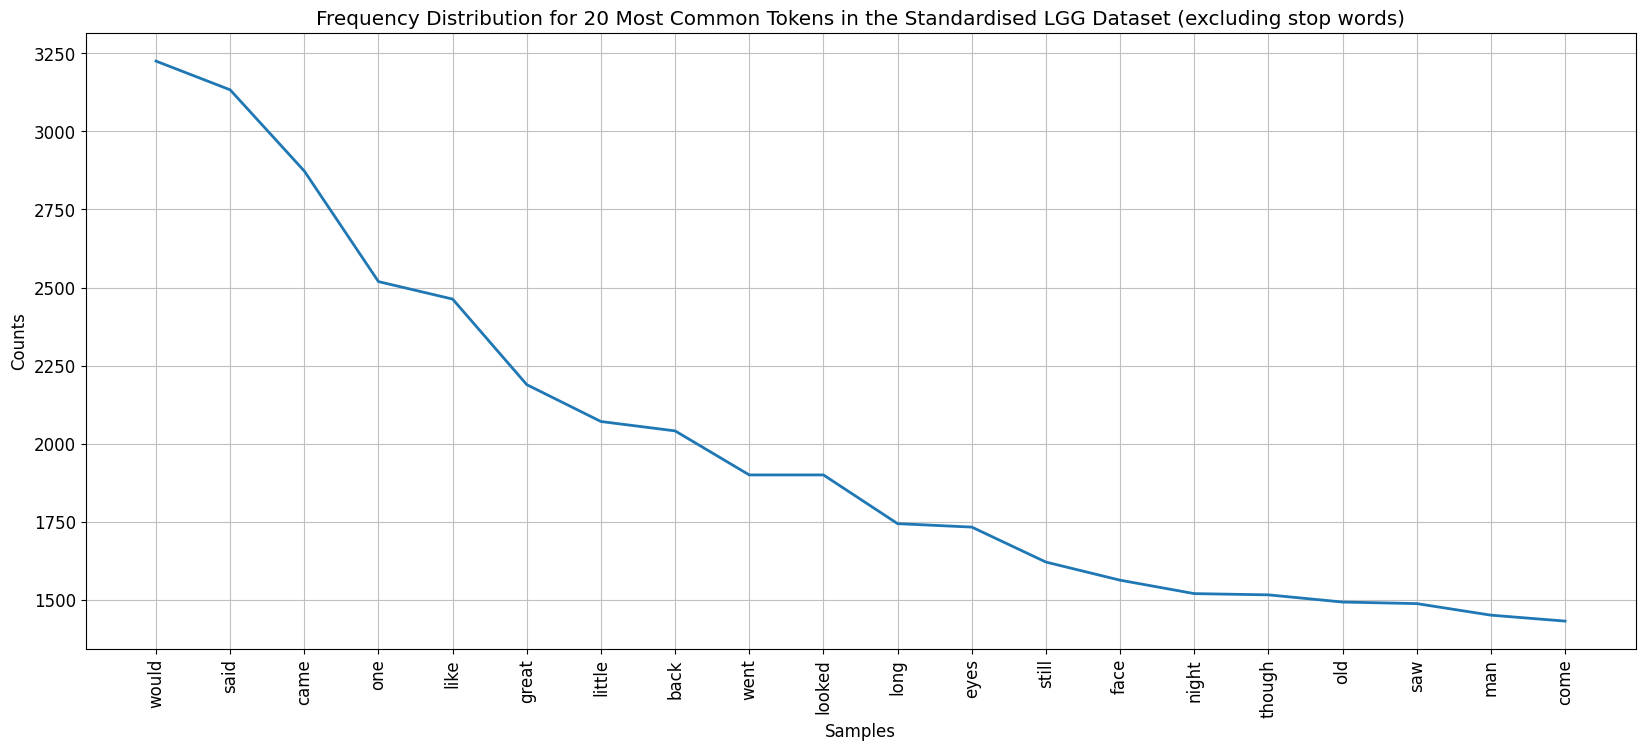

In [78]:
freq_plot(processed_corpus, 20) # Try increasing or decreasing this number to view more or fewer tokens in the visualization

In [82]:
# INPUT: wordlists and the fileid of the wordlist to be tokenised
# OUTPUT: a list of word tokens (in String format) for the inputted fileid
def get_words(plaintext_corpus_read_lists, fileid):
    file_words = process_corpus(plaintext_corpus_read_lists.words(fileid))
    str_words = [str(word) for word in file_words]    
    return str_words

In [87]:
def get_all_words(fileids):
    words_by_file = []
    for file in fileids:
        words_by_file += [get_words(wordlists, file)]
    return words_by_file

words_by_file = get_all_words(fileids)

In [88]:
# INPUT: a list of words in String format
# OUTPUT: the number of unique words divided by
#         the total words in the inputted list
def lexical_diversity(str_words_list):
    return len(set(str_words_list))/len(str_words_list)

Add to the inventory...

In [89]:
lexdiv_by_file = []
for words in words_by_file:
    lexdiv_by_file += [lexical_diversity(words)]

df['lexicaldiversity'] = lexdiv_by_file
df_lexdiv = df.sort_values(by=['lexicaldiversity', 'title'], inplace=False, ascending=True)
df_lexdiv

,fileid,title,lexicaldiversity
10,205174251.txt,Scots quair - Sunset song - NF.523.b.29,0.136252
8,205174249.txt,Scots quair - Cloud howe - NF.523.b.30,0.143998
6,205174247.txt,Spartacus - Vts.6.k.19,0.173469
9,205174250.txt,Scots quair - Grey granite - NF.523.b.31,0.178205
12,205174253.txt,Nine against the unknown - S.72.d.10,0.197000
2,205174243.txt,Three go back - Vts.152.f.22,0.210224
14,205174255.txt,Gay hunter - Vts.215.j.26,0.211580
13,205174254.txt,Conquest of the Maya - S.60.c,0.218136
5,205174246.txt,Image and superscription - Vts.118.l.16,0.221223
0,205174241.txt,Niger - R.176.i,0.224656


For the entire corpus:

In [90]:
lexical_diversity(processed_corpus)

0.062426855972073654

The table isn't bad but charts can make it easier to compare calculations more quickly, so let's visualize the lexical diversity scores!

In [91]:
sorted_titles = list(df_lexdiv['title'])
sorted_lexdiv = list(df_lexdiv['lexicaldiversity'])
source = pd.DataFrame({
    'Title': sorted_titles,
    'Lexdiv': sorted_lexdiv
})

alt.Chart(source, title="Lexical Diversity of Gibbon's Works").mark_bar(size=30).encode(
    alt.X('Title', axis=alt.Axis(title='Lewis Grassic Gibbon Work'), type='nominal', sort=None),  # If sort unspecified, chart will sort x-axis values alphabetically
    alt.Y('Lexdiv', axis=alt.Axis(title='Lexical Diversity')),
    alt.Order(
      # Sort the segments of the bars by this field
      'Lexdiv',
      sort='ascending'
    )
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).properties(
    width=500
)

#     alt.Y('Lexdiv', axis=alt.Axis(format='%', title='Lexical Diversity')),

alt.Chart(...)

Could we sort these chronologically?

We can add information available from the [digital.nls.uk](https://data.nls.uk/wp-content/uploads/2020/10/digital.nls.uk) website about the publication dates to our inventory...

In [92]:
published = [1932, 1933, 1933, 1934, 1933, 1932, 1934, 1934, 1934, 1931, 1932, 1934, 1932, 1930, 1931, 1928]
df_lexdiv['published'] = published
df_pub = df_lexdiv.sort_values(by=['published', 'title'], inplace=False, ascending=True)
df_pub.head()

,fileid,title,lexicaldiversity,published
11,205174252.txt,"Hanno, or, The future of exploration - S.114.j.21",0.417439,1928
7,205174248.txt,"Persian dawns, Egyptian nights - Vts.148.d.8",0.248061,1930
0,205174241.txt,Niger - R.176.i,0.224656,1931
1,205174242.txt,Thirteenth disciple - Vts.137.d,0.261473,1931
3,205174244.txt,Calends of Cairo - Vts.153.c.16,0.234137,1932


Then we can recreate the bar chart with the bars (books) sorted by year of publication:

In [93]:
sorted_titles = list(df_pub['title'])
sorted_lexdiv = list(df_pub['lexicaldiversity'])
sorted_published = list(df_pub['published'])
source = pd.DataFrame({
    'Title': sorted_titles,
    'Lexdiv': sorted_lexdiv,
    'Published': sorted_published
})

alt.Chart(source, title="Lexical Diversity of Gibbon's Works").mark_bar(size=30).encode(
    alt.X('Title', axis=alt.Axis(title='Title of Lewis Grassic Gibbon Work'), type='nominal', sort=None),  # If sort unspecified, chart will sort x-axis values alphabetically
    alt.Y('Lexdiv', axis=alt.Axis(title='Lexical Diversity')),
    alt.Order(
      # Sort the segments of the bars by this field
      'Lexdiv',
      sort='descending'
    ),
    color=alt.Color('Published:O', legend = alt.Legend(title='Date Published')),
    tooltip='Title:N'
).configure_axis(
    grid=False,
    labelFontSize=12,
    titleFontSize=12,
    labelAngle=-45
).configure_title(
    fontSize=14,
).configure_view(
    strokeWidth=0
).properties(
    width=500
)

alt.Chart(...)

To get the lexical diversity per year...

In [48]:
# dictionary associating works with year they were published
pub_yr = {1928: [], 1930: [], 1931: [], 1932: [], 1933: [], 1934: []}
for index,row in df_pub.iterrows():
    pub_yr[row[3]] += [row[0]]
print(pub_yr)

{1928: ['205174252.txt'], 1930: ['205174248.txt'], 1931: ['205174244.txt', '205174242.txt'], 1932: ['205174241.txt', '205174251.txt', '205202834.txt', '205174243.txt'], 1933: ['205174246.txt', '205174249.txt', '205174247.txt'], 1934: ['205174254.txt', '205174255.txt', '205174245.txt', '205174253.txt', '205174250.txt']}


/tmp/ipykernel_187788/2132253417.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pub_yr[row[3]] += [row[0]]


In [95]:
lexdiv_by_year = []
for key,value in pub_yr.items():
    lexdiv_by_file = []
    for fileid in value:
        file_words = wordlists.words(fileid)
        str_words = [str(w.lower()) for w in file_words if w.isalpha()]
        lexdiv_by_file += [lexical_diversity(str_words)]
    lexdiv_by_year += [sum(lexdiv_by_file)/len(lexdiv_by_file)]
print(lexdiv_by_year)

[0.23601900972590628, 0.13157772585910785, 0.1292755998169271, 0.1069772992539837, 0.09077813517219867, 0.11185025739806571]


In [96]:
pub_years = [1928, 1930, 1931, 1932, 1933, 1934]
pub_lex = dict(zip(pub_years, lexdiv_by_year))
pub_lex

{1928: 0.23601900972590628,
 1930: 0.13157772585910785,
 1931: 0.1292755998169271,
 1932: 0.1069772992539837,
 1933: 0.09077813517219867,
 1934: 0.11185025739806571}

Now we can visualize the average lexical diversity score for each year Gibbon published in:

In [97]:


source = pd.DataFrame({
    'Year': pub_years,
    'Average Lexical Diversity': lexdiv_by_year
})

alt.Chart(source, title="Average Yearly Lexical Diversity of Gibbon First Editions").mark_bar(size=60).encode(
    alt.X('Year', axis=alt.Axis(title='Year of Publication'), type='ordinal'),
    alt.Y('Average Lexical Diversity', axis=alt.Axis(title='Average Lexical Diversity'))
).configure_axis(
    grid=False,
    labelFontSize=12,
    titleFontSize=12,
    labelAngle=0
).configure_title(
    fontSize=14,
).configure_view(
    strokeWidth=0
).properties(
    width=365
)

alt.Chart(...)

So Gibbon's lexical diversity does decrease over time, excepting a small increase in the last year he published, 1934!